<a href="https://colab.research.google.com/github/AyushiB56/BST/blob/main/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gensim==4.3.0 numpy==1.23.5 scipy==1.10.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyfume to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=95cd61553a04e13c85e8bc7a87b87de60ea1fa10ebf4e84b4d5284adcd1343fc
  Stored in directory: /root/.cache/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3506 sha256=f7f2de7a60c46f9dab18267420360de95ea

In [1]:
from gensim.models import Word2Vec, KeyedVectors

In [2]:

import gensim.downloader as api

In [3]:
nlp= api.load("word2vec-google-news-300")

[==------------------------------------------------] 5.3% 87.5/1662.8MB downloaded

KeyboardInterrupt: 

In [ ]:
nlp.shape

In [ ]:
nlp['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

1. api.load("word2vec-google-news-300"):
This downloads a pre-trained binary file (like GoogleNews-vectors-negative300.bin.gz).

It loads it using KeyedVectors.load_word2vec_format(..., binary=True).

Returns an object of type KeyedVectors, not Word2Vec.

So nlp is an instance of KeyedVectors, not a full Word2Vec model. That’s why it doesn't have .train() or .build_vocab(), but it does have .similarity(), .most_similar(), .get_vector(), etc.



In [ ]:
type(nlp)

gensim.models.keyedvectors.KeyedVectors

🧠 Why use KeyedVectors?
You don’t always need to train Word2Vec models. Sometimes you just want to:

Load pre-trained vectors (e.g., Google News, GloVe)

Find similar words

Do analogies (e.g., king - man + woman = ?)

Visualize word embeddings

For all of these, KeyedVectors is perfect — it loads fast, uses less memory, and is ready to go.



In [ ]:
nlp.similarity("queen","king") # dot(matutils.unitvec(self[w1]), matutils.unitvec(self[w2]))

0.6510957

In [ ]:
nlp.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [ ]:
nlp.most_similar("man")

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [ ]:
wv= nlp['king']-nlp['man']+nlp['woman']

In [ ]:
wv

array([ 4.29687500e-02, -1.78222656e-01, -1.29089355e-01,  1.15234375e-01,
        2.68554688e-03, -1.02294922e-01,  1.95800781e-01, -1.79504395e-01,
        1.95312500e-02,  4.09919739e-01, -3.68164062e-01, -3.96484375e-01,
       -1.56738281e-01,  1.46484375e-03, -9.30175781e-02, -1.16455078e-01,
       -5.51757812e-02, -1.07574463e-01,  7.91015625e-02,  1.98974609e-01,
        2.38525391e-01,  6.34002686e-02, -2.17285156e-02,  0.00000000e+00,
        4.72412109e-02, -2.17773438e-01, -3.44726562e-01,  6.37207031e-02,
        3.16406250e-01, -1.97631836e-01,  8.59375000e-02, -8.11767578e-02,
       -3.71093750e-02,  3.15551758e-01, -3.41796875e-01, -4.68750000e-02,
        9.76562500e-02,  8.39843750e-02, -9.71679688e-02,  5.17578125e-02,
       -5.00488281e-02, -2.20947266e-01,  2.29492188e-01,  1.26403809e-01,
        2.49023438e-01,  2.09960938e-02, -1.09863281e-01,  5.81054688e-02,
       -3.35693359e-02,  1.29577637e-01,  2.41699219e-02,  3.48129272e-02,
       -2.60009766e-01,  

In [ ]:
nlp.most_similar([wv])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [ ]:
nlp

training word2vec model from scatch

In [1]:


paragraph = """I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""



pre-training the dat

In [2]:
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
doc= nlp("""I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""
)

In [64]:
corpus = '''I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career'''

In [8]:
doc

I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision fo

In [41]:
cleaned_text=[]

In [44]:
import nltk

In [77]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [54]:
lemma= WordNetLemmatizer()
import re

In [61]:
import json

In [71]:
tokenizer=

TypeError: word_tokenize() missing 1 required positional argument: 'text'

In [74]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [83]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [86]:
cleaned_text2=[]

In [99]:
for sentence in sent_tokenize(corpus):
  new_list2= word_tokenize(sentence)
  new_list2= [lemma.lemmatize(word) for word in new_list2 if word not in stopwords.words("english")]

  print(new_list2)
  new_list2= ' '.join(new_list2)
  cleaned_text2.append(new_list2)


['I', 'three', 'vision', 'India', '.']
['In', '3000', 'year', 'history', ',', 'people', 'world', 'come', 'invaded', 'u', ',', 'captured', 'land', ',', 'conquered', 'mind', '.']
['From', 'Alexander', 'onwards', ',', 'Greeks', ',', 'Turks', ',', 'Moguls', ',', 'Portuguese', ',', 'British', ',', 'French', ',', 'Dutch', ',', 'came', 'looted', 'u', ',', 'took', '.']
['Yet', 'done', 'nation', '.']
['We', 'conquered', 'anyone', '.']
['We', 'grabbed', 'land', ',', 'culture', ',', 'history', 'tried', 'enforce', 'way', 'life', '.']
['Why', '?']
['Because', 'respect', 'freedom', 'others.That', 'first', 'vision', 'freedom', '.']
['I', 'believe', 'India', 'got', 'first', 'vision', '1857', ',', 'started', 'War', 'Independence', '.']
['It', 'freedom', 'must', 'protect', 'nurture', 'build', '.']
['If', 'free', ',', 'one', 'respect', 'u', '.']
['My', 'second', 'vision', 'India', '’', 'development', '.']
['For', 'fifty', 'year', 'developing', 'nation', '.']
['It', 'time', 'see', 'developed', 'nation', '

In [116]:
cleaned_text

['visions India',
 '3000 years history people world come invaded captured lands conquered minds',
 'Alexander onwards Greeks Turks Moguls Portuguese British French Dutch came looted took',
 'nation',
 'conquered',
 'grabbed land culture history tried enforce way life',
 '',
 'respect freedom',
 'vision freedom',
 'believe India got vision 1857 started War Independence',
 'freedom protect nurture build',
 'free respect',
 'second vision India development',
 'years developing nation',
 'time developed nation',
 '5 nations world terms GDP',
 '10 percent growth rate areas',
 'poverty levels falling',
 'achievements globally recognised today',
 'lack self confidence developed nation self reliant self assured',
 'incorrect',
 'vision',
 'India stand world',
 'believe India stands world respect',
 'strength respects strength',
 'strong military power economic power',
 'hand hand',
 'good fortune worked great minds',
 'Dr. Vikram Sarabhai Dept space Professor Satish Dhawan succeeded Dr. Brahm 

In [100]:
cleaned_text2

['I three vision India .',
 'In 3000 year history , people world come invaded u , captured land , conquered mind .',
 'From Alexander onwards , Greeks , Turks , Moguls , Portuguese , British , French , Dutch , came looted u , took .',
 'Yet done nation .',
 'We conquered anyone .',
 'We grabbed land , culture , history tried enforce way life .',
 'Why ?',
 'Because respect freedom others.That first vision freedom .',
 'I believe India got first vision 1857 , started War Independence .',
 'It freedom must protect nurture build .',
 'If free , one respect u .',
 'My second vision India ’ development .',
 'For fifty year developing nation .',
 'It time see developed nation .',
 'We among top 5 nation world term GDP .',
 'We 10 percent growth rate area .',
 'Our poverty level falling .',
 'Our achievement globally recognised today .',
 'Yet lack self-confidence see developed nation , self-reliant self-assured .',
 'Isn ’ incorrect ?',
 'I third vision .',
 'India must stand world .',
 'Bec

In [123]:
cleaned_text=[]

In [124]:
doc

I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision fo

In [249]:
cleaned_text

[<generator object <genexpr> at 0x7a59622224d0>,
 <generator object <genexpr> at 0x7a59622231d0>,
 <generator object <genexpr> at 0x7a59622213c0>,
 <generator object <genexpr> at 0x7a5962223d30>,
 <generator object <genexpr> at 0x7a5962221080>,
 <generator object <genexpr> at 0x7a5962220a00>,
 <generator object <genexpr> at 0x7a5962221ff0>,
 <generator object <genexpr> at 0x7a5962220d40>,
 <generator object <genexpr> at 0x7a5962220fb0>,
 <generator object <genexpr> at 0x7a5962222c20>,
 <generator object <genexpr> at 0x7a5962222330>,
 <generator object <genexpr> at 0x7a5962221a40>,
 <generator object <genexpr> at 0x7a5962223ac0>,
 <generator object <genexpr> at 0x7a59622228e0>,
 <generator object <genexpr> at 0x7a5962223100>,
 <generator object <genexpr> at 0x7a5962223780>,
 <generator object <genexpr> at 0x7a5962223510>,
 <generator object <genexpr> at 0x7a59622225a0>,
 <generator object <genexpr> at 0x7a5962222cf0>,
 <generator object <genexpr> at 0x7a5962221150>,
 <generator object <

In [255]:
cleaned_text

[('vision', 'India'),
 ('3000',
  'year',
  'history',
  'people',
  'world',
  'come',
  'invade',
  'capture',
  'land',
  'conquer',
  'mind'),
 ('Alexander',
  'onwards',
  'Greeks',
  'Turks',
  'Moguls',
  'Portuguese',
  'British',
  'French',
  'Dutch',
  'come',
  'loot',
  'take'),
 ('nation',),
 ('conquer',),
 ('grab', 'land', 'culture', 'history', 'try', 'enforce', 'way', 'life'),
 (),
 ('respect', 'freedom'),
 ('vision', 'freedom'),
 ('believe', 'India', 'get', 'vision', '1857', 'start', 'War', 'Independence'),
 ('freedom', 'protect', 'nurture', 'build'),
 ('free', 'respect'),
 ('second', 'vision', 'India', 'development'),
 ('year', 'develop', 'nation'),
 ('time', 'developed', 'nation'),
 ('5', 'nation', 'world', 'term', 'GDP'),
 ('10', 'percent', 'growth', 'rate', 'area'),
 ('poverty', 'level', 'fall'),
 ('achievement', 'globally', 'recognise', 'today'),
 ('lack',
  'self',
  'confidence',
  'developed',
  'nation',
  'self',
  'reliant',
  'self',
  'assure'),
 ('incorre

In [120]:
cleaned_text=[]
for sentence in doc.sents:

  #new_list = [word.text for word in sentence if not word.is_stop and not word.is_punct and not word.is_space]
  new_list= [word.lemma_ for word in sentence if not word.is_stop and not word.is_punct and not word.is_space ]
  print(new_list)
  cleaned_text.append(new_list)

   # print(sentence)


['vision', 'India']
['3000', 'year', 'history', 'people', 'world', 'come', 'invade', 'capture', 'land', 'conquer', 'mind']
['Alexander', 'onwards', 'Greeks', 'Turks', 'Moguls', 'Portuguese', 'British', 'French', 'Dutch', 'come', 'loot', 'take']
['nation']
['conquer']
['grab', 'land', 'culture', 'history', 'try', 'enforce', 'way', 'life']
[]
['respect', 'freedom']
['vision', 'freedom']
['believe', 'India', 'get', 'vision', '1857', 'start', 'War', 'Independence']
['freedom', 'protect', 'nurture', 'build']
['free', 'respect']
['second', 'vision', 'India', 'development']
['year', 'develop', 'nation']
['time', 'developed', 'nation']
['5', 'nation', 'world', 'term', 'GDP']
['10', 'percent', 'growth', 'rate', 'area']
['poverty', 'level', 'fall']
['achievement', 'globally', 'recognise', 'today']
['lack', 'self', 'confidence', 'developed', 'nation', 'self', 'reliant', 'self', 'assure']
['incorrect']
['vision']
['India', 'stand', 'world']
['believe', 'India', 'stand', 'world', 'respect']
['stren

✅ Which one to use?
If your input is well-punctuated, both do great — NLTK may seem smoother for sentence splitting.

If you're doing advanced NLP (POS tagging, dependency parsing, NER, etc.), spaCy is way more powerful.

If your text is noisy or pre-cleaned, NLTK might give cleaner sentence chunks, but spaCy can be customized.



In [121]:
cleaned_text

[['vision', 'India'],
 ['3000',
  'year',
  'history',
  'people',
  'world',
  'come',
  'invade',
  'capture',
  'land',
  'conquer',
  'mind'],
 ['Alexander',
  'onwards',
  'Greeks',
  'Turks',
  'Moguls',
  'Portuguese',
  'British',
  'French',
  'Dutch',
  'come',
  'loot',
  'take'],
 ['nation'],
 ['conquer'],
 ['grab', 'land', 'culture', 'history', 'try', 'enforce', 'way', 'life'],
 [],
 ['respect', 'freedom'],
 ['vision', 'freedom'],
 ['believe', 'India', 'get', 'vision', '1857', 'start', 'War', 'Independence'],
 ['freedom', 'protect', 'nurture', 'build'],
 ['free', 'respect'],
 ['second', 'vision', 'India', 'development'],
 ['year', 'develop', 'nation'],
 ['time', 'developed', 'nation'],
 ['5', 'nation', 'world', 'term', 'GDP'],
 ['10', 'percent', 'growth', 'rate', 'area'],
 ['poverty', 'level', 'fall'],
 ['achievement', 'globally', 'recognise', 'today'],
 ['lack',
  'self',
  'confidence',
  'developed',
  'nation',
  'self',
  'reliant',
  'self',
  'assure'],
 ['incorrect

In [122]:
all_words = [word for sentence in cleaned_text for word in sentence]

In [123]:
len(all_words)

138

In [12]:
all_words

['vision',
 'India',
 '3000',
 'year',
 'history',
 'people',
 'world',
 'come',
 'invade',
 'capture',
 'land',
 'conquer',
 'mind',
 'Alexander',
 'onwards',
 'Greeks',
 'Turks',
 'Moguls',
 'Portuguese',
 'British',
 'French',
 'Dutch',
 'come',
 'loot',
 'take',
 'nation',
 'conquer',
 'grab',
 'land',
 'culture',
 'history',
 'try',
 'enforce',
 'way',
 'life',
 'respect',
 'freedom',
 'vision',
 'freedom',
 'believe',
 'India',
 'get',
 'vision',
 '1857',
 'start',
 'War',
 'Independence',
 'freedom',
 'protect',
 'nurture',
 'build',
 'free',
 'respect',
 'second',
 'vision',
 'India',
 'development',
 'year',
 'develop',
 'nation',
 'time',
 'developed',
 'nation',
 '5',
 'nation',
 'world',
 'term',
 'GDP',
 '10',
 'percent',
 'growth',
 'rate',
 'area',
 'poverty',
 'level',
 'fall',
 'achievement',
 'globally',
 'recognise',
 'today',
 'lack',
 'self',
 'confidence',
 'developed',
 'nation',
 'self',
 'reliant',
 'self',
 'assure',
 'incorrect',
 'vision',
 'India',
 'stand'

In [124]:
vocab= sorted(set(all_words))

In [125]:


word_to_idex= {word:idx for idx,word in enumerate(vocab)} # this means that at which index the word is stored in the dictionary
idx_to_word= {idx:word for word,idx in word_to_idex.items()} #this means that at which index the key is stored in the memory

In [126]:
idx_to_word

{0: '10',
 1: '1857',
 2: '3000',
 3: '5',
 4: 'Alexander',
 5: 'Brahm',
 6: 'British',
 7: 'Dept',
 8: 'Dhawan',
 9: 'Dr.',
 10: 'Dutch',
 11: 'French',
 12: 'GDP',
 13: 'Greeks',
 14: 'Independence',
 15: 'India',
 16: 'Moguls',
 17: 'Portuguese',
 18: 'Prakash',
 19: 'Professor',
 20: 'Sarabhai',
 21: 'Satish',
 22: 'Turks',
 23: 'Vikram',
 24: 'War',
 25: 'achievement',
 26: 'area',
 27: 'assure',
 28: 'believe',
 29: 'build',
 30: 'capture',
 31: 'career',
 32: 'closely',
 33: 'come',
 34: 'confidence',
 35: 'conquer',
 36: 'consider',
 37: 'culture',
 38: 'develop',
 39: 'developed',
 40: 'development',
 41: 'economic',
 42: 'enforce',
 43: 'fall',
 44: 'father',
 45: 'fortune',
 46: 'free',
 47: 'freedom',
 48: 'get',
 49: 'globally',
 50: 'good',
 51: 'grab',
 52: 'great',
 53: 'growth',
 54: 'hand',
 55: 'history',
 56: 'incorrect',
 57: 'invade',
 58: 'lack',
 59: 'land',
 60: 'level',
 61: 'life',
 62: 'loot',
 63: 'lucky',
 64: 'material',
 65: 'milestone',
 66: 'military',

In [127]:
window_size=2

✅ Neural networks can't work directly with words
You must convert words to numbers (IDs) to feed them into embedding layers or matrix operations.

No, TF-IDF or BoW are not used when training Word2Vec models.
You need to stick with word IDs and work with word pairs because:

🤔 Why Not TF-IDF or BoW?
1. ❌ TF-IDF/BoW lose word order
TF-IDF and BoW represent documents as word-frequency vectors, but they don’t preserve local word order.
Word2Vec (especially Skip-gram and CBOW) is all about context — what words appear near each other.

Example: BoW of ["I love dogs", "dogs are great"] doesn't care that “love” and “dogs” appeared next to each other.

2. ❌ They don’t generate (center, context) pairs
Skip-gram needs training examples like:

arduino
Copy
Edit
("dogs", "love"), ("dogs", "are") — i.e., word pairs
BoW/TF-IDF gives:

python
Copy
Edit
[0.4, 0.0, 0.3, 0.1, ...]  # Just vector representation of a document
There's no context relationship like in Word2Vec.

3. ❌ TF-IDF/BoW are static
They don’t learn embeddings — they are based only on word counts.
Word2Vec learns vector representations that capture meaning.



In [128]:
sentences_ids = [[word_to_idex[word] for word in sentence] for sentence in cleaned_text]


In [129]:
idx_to_word[14]

'Independence'

In [130]:
sentences_ids

[[95, 15],
 [2, 99, 55, 73, 98, 33, 57, 30, 59, 35, 67],
 [4, 71, 13, 22, 16, 17, 6, 11, 10, 33, 62, 90],
 [68],
 [35],
 [51, 59, 37, 55, 94, 42, 96, 61],
 [],
 [81, 47],
 [95, 47],
 [28, 15, 48, 95, 1, 86, 24, 14],
 [47, 77, 70, 29],
 [46, 81],
 [82, 95, 15, 40],
 [99, 38, 68],
 [92, 39, 68],
 [3, 68, 98, 91, 12],
 [0, 74, 53, 78, 26],
 [75, 60, 43],
 [25, 49, 79, 93],
 [58, 83, 34, 39, 68, 83, 80, 83, 27],
 [56],
 [95],
 [15, 85, 98],
 [28, 15, 85, 98, 81],
 [87, 81, 87],
 [88, 66, 76, 41, 76],
 [54, 54],
 [50, 45, 97, 52, 67],
 [9, 23, 20, 7, 84, 19, 21, 8, 89, 9, 5, 18, 44, 69, 64],
 [63, 97, 32, 36, 52, 72, 61],
 [65, 31]]

In [131]:
def generate_skipgram_pairs(sentences_ids, window_size=2):
    pairs = []

    for sentence in sentences_ids:
        for center_idx, center_word_id in enumerate(sentence):
            # Context window
            for offset in range(-window_size, window_size + 1):
                context_idx = center_idx + offset
                if offset == 0 or context_idx < 0 or context_idx >= len(sentence):
                    continue
                context_word_id = sentence[context_idx]
                pairs.append((center_word_id, context_word_id))  # (center, context)

    return pairs


implement word2vec

In [132]:
pairs=generate_skipgram_pairs(sentences_ids)

In [133]:
id_to_word[14]

'Independence'

In [134]:
pairs

[(95, 15),
 (15, 95),
 (2, 99),
 (2, 55),
 (99, 2),
 (99, 55),
 (99, 73),
 (55, 2),
 (55, 99),
 (55, 73),
 (55, 98),
 (73, 99),
 (73, 55),
 (73, 98),
 (73, 33),
 (98, 55),
 (98, 73),
 (98, 33),
 (98, 57),
 (33, 73),
 (33, 98),
 (33, 57),
 (33, 30),
 (57, 98),
 (57, 33),
 (57, 30),
 (57, 59),
 (30, 33),
 (30, 57),
 (30, 59),
 (30, 35),
 (59, 57),
 (59, 30),
 (59, 35),
 (59, 67),
 (35, 30),
 (35, 59),
 (35, 67),
 (67, 59),
 (67, 35),
 (4, 71),
 (4, 13),
 (71, 4),
 (71, 13),
 (71, 22),
 (13, 4),
 (13, 71),
 (13, 22),
 (13, 16),
 (22, 71),
 (22, 13),
 (22, 16),
 (22, 17),
 (16, 13),
 (16, 22),
 (16, 17),
 (16, 6),
 (17, 22),
 (17, 16),
 (17, 6),
 (17, 11),
 (6, 16),
 (6, 17),
 (6, 11),
 (6, 10),
 (11, 17),
 (11, 6),
 (11, 10),
 (11, 33),
 (10, 6),
 (10, 11),
 (10, 33),
 (10, 62),
 (33, 11),
 (33, 10),
 (33, 62),
 (33, 90),
 (62, 10),
 (62, 33),
 (62, 90),
 (90, 33),
 (90, 62),
 (51, 59),
 (51, 37),
 (59, 51),
 (59, 37),
 (59, 55),
 (37, 51),
 (37, 59),
 (37, 55),
 (37, 94),
 (55, 59),
 (55

In [135]:
# one hot encoding

import numpy as np


def one_hot_encoding(word_id, vocab_size):

  one_hot_vector= np.zeros(len(vocab_size))
  one_hot_vector[word_id]=1
  return one_hot_vector

context_one_hot_vector=[]
center_one_hot_vector=[]

for center_word_id,context_word_id in pairs:
  context_one_hot_vector=one_hot_encoding(context_word_id, vocab)
  center_one_hot_vector= one_hot_encoding(center_word_id, vocab)




In [113]:
context_one_hot_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [61]:
center_one_hot_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


🔁 If You Used One-Hot Encoding (OHE)
You’d do something like:

Create a vocab_size × vocab_size identity matrix (each row = one-hot vector).

Multiply that OHE vector by a vocab_size × embedding_dim weight matrix.

This would give you an embedding_dim vector for that word.

So:

python
Copy
Edit
embedding = one_hot_vector @ W  # W is vocab_size × embedding_dim
You would then learn W through training — the weights get updated via backpropagation.



✅ What nn.Embedding Does Instead
Using:

python
Copy
Edit
self.in_embeddings = nn.Embedding(vocab_size, embedding_dim)
PyTorch internally does exactly the same thing, but more efficiently:

It stores a vocab_size × embedding_dim matrix.

Instead of creating a one-hot vector and doing matrix multiplication, it just looks up the row corresponding to your word index.

This is:

python
Copy
Edit
embedding = self.in_embeddings[word_id]
It’s:

Faster (no matrix multiplication, just indexing)

Memory efficient (you don’t need to store the full one-hot matrix)
📦 nn.Embedding(vocab_size, embedding_dim) is:
A learnable weight matrix of shape:

[vocab_size, embedding_dim]

Each row in that matrix is the embedding vector for one word (indexed by word ID).


In [62]:
weight= np.random.randn(len(vocab), 5)

In [66]:
center_one_hot_vector.shape

(100,)

In [63]:
weight

array([[-8.35070832e-01,  3.27408672e-01, -4.96757397e-02,
        -7.04312040e-01, -2.01481839e+00],
       [-9.56297735e-01,  5.40130233e-01, -4.33396722e-01,
         8.55267028e-01,  4.20612506e-01],
       [ 3.10265352e-01, -4.34817314e-01,  2.27013545e+00,
         1.07568368e-01,  3.75053958e-01],
       [-1.68761375e+00,  1.85392723e+00,  9.62167264e-01,
         2.15255308e+00,  5.46668249e-01],
       [ 1.64656882e+00,  9.66773034e-01,  2.75458532e-02,
         9.77509012e-01, -2.78272266e+00],
       [ 7.15945898e-01, -4.29086301e-01,  4.48557569e-01,
         3.35146519e-01,  6.67111430e-01],
       [ 2.35131066e+00, -5.10987053e-01, -6.91677825e-01,
        -1.00371870e+00,  5.23699359e-01],
       [ 9.96883372e-02,  1.54525894e+00,  1.42607329e-01,
         5.85605671e-01, -1.36900742e+00],
       [-6.61474207e-01,  3.15358261e-01,  7.88892208e-01,
         3.28044937e-01, -5.61624574e-01],
       [-5.54038757e-01, -6.55737777e-01, -7.30369372e-01,
        -1.03773210e+00

In [67]:
embeddng_vec= np.dot(center_one_hot_vector,weight)

In [68]:
embeddng_vec

array([ 0.42951156, -0.00238388, -1.72216162,  1.91946329, -0.06394563])

In [141]:
W2= np.random.randn(5,len(vocab))

In [178]:
def backpropogation(W1,W2):
  embeddng_vec= np.dot(center_one_hot_vector,W1)
  output_l= np.dot(embeddng_vec,W2)
  softmax_output= softmax(output_l)
  return softmax_output,embeddng_vec,output_l

In [ ]:
-2.54E+00

In [142]:
W2

array([[ 1.82949946e+00, -4.68796332e-01, -5.92252176e-01,
         6.15570264e-01, -8.05804577e-01,  5.49614036e-01,
         2.63805627e-01,  1.19462487e+00,  7.81931474e-01,
        -8.71202411e-01,  1.24778480e+00, -1.24871308e+00,
        -1.87108363e-01,  6.29390303e-01, -6.60570381e-01,
         9.94690109e-01, -1.21871010e+00, -1.15824336e+00,
        -1.28490762e+00,  1.55114049e+00,  7.73118259e-01,
         2.15580062e-01, -5.74041380e-01, -1.24153706e+00,
         2.20117668e-01, -2.54042366e-01, -2.40884488e-01,
         3.88187524e-01,  3.26085334e-01,  1.28967134e+00,
        -8.08048521e-01,  5.70027560e-01, -1.34350124e+00,
         8.80406980e-01, -8.63994898e-01, -7.64508612e-01,
         1.52306281e+00, -2.80828963e-01,  3.52749993e-02,
        -2.01483672e-01,  5.25921088e-01, -5.38606767e-02,
         6.39575323e-01, -1.59439445e+00, -4.38249369e-01,
        -2.56546187e-01, -5.64514385e-01,  3.27052205e-01,
         3.22314974e-01,  1.63510947e+00, -9.84928923e-0

In [73]:
embeddng_vec.shape

(5,)

In [76]:
len(vocab)

100

In [123]:
output_l= np.dot(embeddng_vec,W2)

In [124]:
output_l

array([ 0.29912572, -0.32678253, -2.0872731 , -4.58177218, -1.81759635,
       -0.12604851,  0.95143767, -2.12711725, -3.76678868, -4.53108359,
        0.78105273,  1.27099948,  0.88757933,  0.12537276,  5.49739692,
        0.91091397,  0.11887419, -3.02220573,  1.64913222, -2.77067951,
       -0.20909057,  0.04383361,  1.12365191, -1.75644257,  0.15626568,
        3.54427251,  1.79677561, -0.10033429,  1.40321599,  2.26475997,
        5.34279193,  1.81113959, -4.90261031,  0.61251935, -0.00899541,
       -2.52931275, -4.64944075,  0.40011667, -1.94105308,  0.87584784,
        0.43592348,  5.18909548, -1.08850608, -2.00979102, -1.16827069,
       -0.6079085 , -0.46032951,  1.62738259, -1.02747165,  1.8766419 ,
        1.7409598 ,  0.18878656,  1.12757305,  2.09971907, -1.39079459,
       -2.71058927,  1.33412565,  0.23782396,  1.84254721, -1.7292365 ,
       -3.42054691,  0.95783267, -2.79742574,  2.10217657, -4.94515053,
        0.02900677,  4.64932327, -1.14078505, -0.35871548,  1.76

Given a vector
𝑥
=
[
𝑥
1
,
𝑥
2
,
.
.
.
,
𝑥
𝑛
]
x=[x
1
​
 ,x
2
​
 ,...,x
n
​
 ], softmax is defined as:

softmax
(
𝑥
𝑖
)
=
𝑒
𝑥
𝑖
∑
𝑗
=
1
𝑛
𝑒
𝑥
𝑗
softmax(x
i
​
 )=
∑
j=1
n
​
 e
x
j
​


e
x
i
​


​

You exponentiate each value and divide it by the sum of exponentials of the whole vector. This ensures everything is positive and sums to 1.

So, the biggest value gets the highest softmax score — like attention to the most likely class/word.

In [125]:
def softmax(output_l):
  softmaxx= np.exp(output_l-max(output_l))
  print(softmaxx)
  print(softmaxx.sum())

  return softmaxx/softmaxx.sum()

In [126]:
ab=softmax(output_l)

[5.52610968e-03 2.95522806e-03 5.08182451e-04 4.19442541e-05
 6.65485790e-04 3.61217415e-03 1.06099902e-02 4.88332432e-04
 9.47578758e-05 4.41251558e-05 8.94783037e-03 1.46049109e-02
 9.95363383e-03 4.64472011e-03 1.00000000e+00 1.01886293e-02
 4.61463395e-03 1.99518689e-04 2.13166951e-02 2.56578364e-04
 3.32432882e-03 4.28102288e-03 1.26039501e-02 7.07452907e-04
 4.79044850e-03 1.41830242e-01 2.47081701e-02 3.70626290e-03
 1.66693942e-02 3.94533250e-02 8.56753540e-01 2.50656392e-02
 3.04322630e-05 7.56004929e-03 4.06073078e-03 3.26621135e-04
 3.91998486e-05 6.11335077e-03 5.88196196e-04 9.83754515e-03
 6.33621658e-03 7.34693820e-01 1.37968096e-03 5.49123087e-04
 1.27390586e-03 2.23099987e-03 2.58578425e-03 2.08580706e-02
 1.46651188e-03 2.67624627e-02 2.33668456e-02 4.94879900e-03
 1.26534690e-02 3.34508578e-02 1.01975639e-03 2.72468868e-04
 1.55565848e-02 5.19752381e-03 2.58653844e-02 7.26964134e-04
 1.33963413e-04 1.06780585e-02 2.49806820e-04 3.35331645e-02
 2.91648177e-05 4.218017

In [132]:
y_pred=np.array(ab)

In [128]:
ab[65]

np.float64(0.0008404663386522754)

In [129]:
loss = -np.log(ab[65])

In [130]:
loss

np.float64(7.081553655111794)

If the model assigns a high probability to the correct context word → low loss

If it assigns low probability → high loss

In [131]:
np.exp(-loss)

np.float64(0.0008404663386522753)

In [117]:
error= context_one_hot_vector- ab

In [118]:
error

array([-1.10111199e-03, -5.88847715e-04, -1.01258539e-04, -8.35765554e-06,
       -1.32602215e-04, -7.19748341e-04, -2.11410706e-03, -9.73032981e-05,
       -1.88811007e-05, -8.79221389e-06, -1.78291129e-03, -2.91012005e-03,
       -1.98332393e-03, -9.25489596e-04, -1.99256268e-01, -2.03014826e-03,
       -9.19494740e-04, -3.97553494e-05, -4.24748513e-03, -5.11248474e-05,
       -6.62393354e-04, -8.53020644e-04, -2.51141607e-03, -1.40964426e-04,
       -9.54526891e-04, -2.82605648e-02, -4.92325778e-03, -7.38496114e-04,
       -3.32148128e-03, -7.86132231e-03, -1.70713513e-01, -4.99448573e-03,
       -6.06381916e-06, -1.50638721e-03, -8.09126062e-04, -6.50813084e-05,
       -7.81081555e-06, -1.21812346e-03, -1.17201779e-04, -1.96019253e-03,
       -1.26253087e-03, -1.46392349e-01, -2.74910079e-04, -1.09416217e-04,
       -2.53833729e-04, -4.44540709e-04, -5.15233720e-04, -4.15610130e-03,
       -2.92211685e-04, -5.33258844e-03, -4.65599046e-03, -9.86079220e-04,
       -2.52128302e-03, -

✅ Why we use np.outer(h, error):
h is the hidden vector of shape (D,)

error = y_pred - y_true, shape (V,)

We want dW2 to match the shape of W2: (D, V)

So:

python
Copy
Edit
dW2 = np.outer(h, error)  # This gives us shape (D, V)
Each column of W2 connects the hidden vector to one output word. So for every output word j:

text
Copy
Edit
dW2[:, j] = h * error[j]
Which is exactly what np.outer computes for all j at once.

🧪 Example:
python
Copy
Edit
import numpy as np

h = np.array([1, 2])         # shape (2,)
error = np.array([0.1, 0.2]) # shape (2,)

np.outer(h, error)
Output:

lua
Copy
Edit
array([[0.1, 0.2],
       [0.2, 0.4]])  # shape (2, 2)
❌ If you used np.dot(h, error) instead:
You'd just get a scalar: the sum of elementwise products → 1×0.1 + 2×0.2 = 0.5

That’s not useful for updating a full weight matrix!

# **Back propogation**

In [174]:
def gradient_descent(**args):
  dl_dsoftmax_op= y_pred- context_one_hot_vector
  dw2= np.outer(embeddng_vec,dl_dsoftmax_op)
  dh = np.dot(W2,dl_dsoftmax_op)
  dw1= np.outer(center_one_hot_vector,dh)
  return dw1,dw2


In [177]:
def update_weights(W1,W2):
  learning_rate= 0.001
  update_weight_w1= W1- learning_rate*dw1
  update_weight_w2= W2- learning_rate*dw2
  return update_weight_w1,update_weight_w2

In [133]:
# calculating gradient


#dl/du
# output of hidden layer before softmax is applied- this is softmax+cross entropy loss

dl_dsoftmax_op= y_pred- context_one_hot_vector


In [134]:
dl_dsoftmax_op

array([ 1.10111199e-03,  5.88847715e-04,  1.01258539e-04,  8.35765554e-06,
        1.32602215e-04,  7.19748341e-04,  2.11410706e-03,  9.73032981e-05,
        1.88811007e-05,  8.79221389e-06,  1.78291129e-03,  2.91012005e-03,
        1.98332393e-03,  9.25489596e-04,  1.99256268e-01,  2.03014826e-03,
        9.19494740e-04,  3.97553494e-05,  4.24748513e-03,  5.11248474e-05,
        6.62393354e-04,  8.53020644e-04,  2.51141607e-03,  1.40964426e-04,
        9.54526891e-04,  2.82605648e-02,  4.92325778e-03,  7.38496114e-04,
        3.32148128e-03,  7.86132231e-03,  1.70713513e-01,  4.99448573e-03,
        6.06381916e-06,  1.50638721e-03,  8.09126062e-04,  6.50813084e-05,
        7.81081555e-06,  1.21812346e-03,  1.17201779e-04,  1.96019253e-03,
        1.26253087e-03,  1.46392349e-01,  2.74910079e-04,  1.09416217e-04,
        2.53833729e-04,  4.44540709e-04,  5.15233720e-04,  4.15610130e-03,
        2.92211685e-04,  5.33258844e-03,  4.65599046e-03,  9.86079220e-04,
        2.52128302e-03,  

In [135]:
embeddng_vec

array([ 0.42951156, -0.00238388, -1.72216162,  1.91946329, -0.06394563])

In [161]:
# dl.dw2 = dl.du* du/dw2
#u = W2.T @ embedding_layer_out
#du/dw2 = embedding_layer
#u is output of output layer before softmax function
#(100,5)
dw2= np.outer(embeddng_vec,dl_dsoftmax_op)

Shouldn't this be dL/dh = dL/du * du/dW2 * dW2/dh?

That would only make sense if W2 itself depended on h, which it normally doesn’t — unless you are using dynamic weights or doing meta-learning, which is rare in typical feedforward neural nets or Word2Vec.

✅ Standard case:
In a typical neural network or embedding layer, the flow is:

h is the hidden vector (e.g. from the embedding layer).

u = W2 @ h — matrix-vector multiplication.

L is the loss computed from u.

Then by the chain rule, the gradient is:

𝑑
𝐿
/
𝑑
ℎ
=
𝑑
𝐿
/
𝑑
𝑢
×
𝑑
𝑢
/
𝑑
ℎ
dL/dh=dL/du×du/dh

In [152]:
# dl.dh = dl/du*du/dh
#np.outer(dl_dsoftmax_op,embeddng_vec) * dw2/dembedding_layer
##u = W2.T @ embedding_layer_out
#du/dwh = w2
#(100, 5,100)

dh = np.dot(W2,dl_dsoftmax_op)


In [153]:
dh.shape

(5,)

In [154]:
#✅ Step 4: Gradient w.r.t. W1 (input weights)


#dL/dh × dh/dW1


#h = input_vector*w1
#dh/dw1= input vectore


dw1= np.outer(center_one_hot_vector,dh)

In [155]:
dw1.shape

(100, 5)

In [157]:
learning_rate= 0.001

update_weight_w1= weight- learning_rate*dw1

In [162]:
update_weight_w2= W2- learning_rate*dw2

In [163]:
update_weight_w1

array([[-8.35070832e-01,  3.27408672e-01, -4.96757397e-02,
        -7.04312040e-01, -2.01481839e+00],
       [-9.56297735e-01,  5.40130233e-01, -4.33396722e-01,
         8.55267028e-01,  4.20612506e-01],
       [ 3.10265352e-01, -4.34817314e-01,  2.27013545e+00,
         1.07568368e-01,  3.75053958e-01],
       [-1.68761375e+00,  1.85392723e+00,  9.62167264e-01,
         2.15255308e+00,  5.46668249e-01],
       [ 1.64656882e+00,  9.66773034e-01,  2.75458532e-02,
         9.77509012e-01, -2.78272266e+00],
       [ 7.15945898e-01, -4.29086301e-01,  4.48557569e-01,
         3.35146519e-01,  6.67111430e-01],
       [ 2.35131066e+00, -5.10987053e-01, -6.91677825e-01,
        -1.00371870e+00,  5.23699359e-01],
       [ 9.96883372e-02,  1.54525894e+00,  1.42607329e-01,
         5.85605671e-01, -1.36900742e+00],
       [-6.61474207e-01,  3.15358261e-01,  7.88892208e-01,
         3.28044937e-01, -5.61624574e-01],
       [-5.54038757e-01, -6.55737777e-01, -7.30369372e-01,
        -1.03773210e+00

In [164]:
update_weight_w2

array([[ 1.82949899e+00, -4.68796585e-01, -5.92252220e-01,
         6.15570261e-01, -8.05804634e-01,  5.49613727e-01,
         2.63804719e-01,  1.19462483e+00,  7.81931466e-01,
        -8.71202415e-01,  1.24778403e+00, -1.24871433e+00,
        -1.87109215e-01,  6.29389905e-01, -6.60655964e-01,
         9.94689237e-01, -1.21871050e+00, -1.15824338e+00,
        -1.28490944e+00,  1.55114047e+00,  7.73117974e-01,
         2.15579696e-01, -5.74042458e-01, -1.24153712e+00,
         2.20117258e-01, -2.54054505e-01, -2.40886603e-01,
         3.88187207e-01,  3.26083907e-01,  1.28966797e+00,
        -8.08121845e-01,  5.70025414e-01, -1.34350124e+00,
         8.80406333e-01, -8.63995246e-01, -7.64508640e-01,
         1.52306281e+00, -2.80829487e-01,  3.52749489e-02,
        -2.01484514e-01,  5.25920546e-01, -5.39235539e-02,
         6.39575205e-01, -1.59439450e+00, -4.38249478e-01,
        -2.56546378e-01, -5.64514606e-01,  3.27050420e-01,
         3.22314848e-01,  1.63510718e+00, -9.84930923e-0

In [168]:
new_putput= update_weight(update_weight_w1,update_weight_w2)

[1.17836438e-04 3.41460650e-03 3.53124252e-03 6.31752085e-03
 1.47286825e-01 3.10411724e-02 5.24935907e-04 1.43490249e-03
 1.61710401e-02 2.61584010e-04 1.80681702e-01 2.50360896e-03
 1.99841634e-03 1.61389506e-04 1.54446126e-03 5.16246084e-03
 3.89100412e-04 1.02401493e-01 1.33553566e-04 1.29418874e-03
 6.55406843e-04 9.20674951e-05 2.92573496e-03 7.03761754e-02
 1.88211929e-05 2.12259196e-03 4.71497562e-04 1.11679247e-03
 1.04060033e-03 2.91514330e-06 2.04258303e-03 9.65966841e-05
 4.98206758e-06 1.64158286e-01 9.59123518e-04 1.00000000e+00
 2.13700732e-04 1.22761931e-03 1.05078138e-03 4.90685783e-03
 7.95996858e-07 3.69713006e-03 1.40302782e-02 2.22941020e-03
 5.54555526e-04 5.13407506e-03 7.63056682e-02 1.80630437e-02
 8.75602924e-03 1.69261877e-03 1.32260676e-03 2.33707751e-03
 1.25334323e-04 3.19129686e-04 9.96427462e-04 1.09729435e-02
 4.30299967e-03 5.11934934e-03 1.60900186e-03 1.08640970e-02
 1.13169842e-03 1.30292987e-03 1.54054657e-03 1.19944835e-03
 2.47611788e-04 2.301519

In [169]:
new_putput

array([5.17330609e-05, 1.49909526e-03, 1.55030131e-03, 2.77354523e-03,
       6.46624967e-02, 1.36278293e-02, 2.30459624e-04, 6.29957074e-04,
       7.09947971e-03, 1.14841739e-04, 7.93236593e-02, 1.09914519e-03,
       8.77353357e-04, 7.08539163e-05, 6.78056039e-04, 2.26644581e-03,
       1.70824540e-04, 4.49567448e-02, 5.86332621e-05, 5.68180319e-04,
       2.87739537e-04, 4.04198685e-05, 1.28446877e-03, 3.08968518e-02,
       8.26296124e-06, 9.31869469e-04, 2.06998892e-04, 4.90299044e-04,
       4.56848842e-04, 1.27981878e-06, 8.96743606e-04, 4.24082926e-05,
       2.18724878e-06, 7.20694783e-02, 4.21078541e-04, 4.39024310e-01,
       9.38198162e-05, 5.38954719e-04, 4.61318572e-04, 2.15422987e-03,
       3.49461971e-07, 1.62312997e-03, 6.15963321e-03, 9.78765275e-04,
       2.43463357e-04, 2.25398376e-03, 3.35000433e-02, 7.93011528e-03,
       3.84410970e-03, 7.43100789e-04, 5.80656521e-04, 1.02603384e-03,
       5.50248148e-05, 1.40105690e-04, 4.37455879e-04, 4.81738897e-03,
      

In [171]:
new_putput[65]

np.float64(0.00010104229054264136)

In [173]:
-np.log(new_putput[65])

np.float64(9.199971410517062)

In [ ]:
for epoch in range(5):
  backpropogation(W1,W2)
  gradient_descent(softmax_output,embeddng_vec,output_l)
  update_weights(W1,W2

Flow
- data preprocessing
- generate training data
- one-hot encoding
- forward propogation
-loss
-update weights
-back propogation

pre processing

In [6]:
import spacy

In [7]:
nlp = spacy.load("en_core_web_sm")

In [8]:
doc= nlp("""I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""
)

In [9]:
corpus=[]
for sentence in doc.sents:
  new_list= [word.lemma_ for word in sentence if not word.is_stop and not word.is_punct and not word.is_space ]
  corpus.append(new_list)



In [10]:
corpus

[['vision', 'India'],
 ['3000',
  'year',
  'history',
  'people',
  'world',
  'come',
  'invade',
  'capture',
  'land',
  'conquer',
  'mind'],
 ['Alexander',
  'onwards',
  'Greeks',
  'Turks',
  'Moguls',
  'Portuguese',
  'British',
  'French',
  'Dutch',
  'come',
  'loot',
  'take'],
 ['nation'],
 ['conquer'],
 ['grab', 'land', 'culture', 'history', 'try', 'enforce', 'way', 'life'],
 [],
 ['respect', 'freedom'],
 ['vision', 'freedom'],
 ['believe', 'India', 'get', 'vision', '1857', 'start', 'War', 'Independence'],
 ['freedom', 'protect', 'nurture', 'build'],
 ['free', 'respect'],
 ['second', 'vision', 'India', 'development'],
 ['year', 'develop', 'nation'],
 ['time', 'developed', 'nation'],
 ['5', 'nation', 'world', 'term', 'GDP'],
 ['10', 'percent', 'growth', 'rate', 'area'],
 ['poverty', 'level', 'fall'],
 ['achievement', 'globally', 'recognise', 'today'],
 ['lack',
  'self',
  'confidence',
  'developed',
  'nation',
  'self',
  'reliant',
  'self',
  'assure'],
 ['incorrect

step 2- wordto id and id_to_word

In [11]:
word_to_id = []
id_to_word=[]

In [12]:
all_word= [word for sentence in corpus for word in sentence ]

In [13]:
vocab = sorted(set(all_word))

In [14]:
word_to_id={word:id for id, word in enumerate(vocab)}
id_to_word={value:key for key, value in word_to_id.items()}


In [15]:
word_to_id

{'10': 0,
 '1857': 1,
 '3000': 2,
 '5': 3,
 'Alexander': 4,
 'Brahm': 5,
 'British': 6,
 'Dept': 7,
 'Dhawan': 8,
 'Dr.': 9,
 'Dutch': 10,
 'French': 11,
 'GDP': 12,
 'Greeks': 13,
 'Independence': 14,
 'India': 15,
 'Moguls': 16,
 'Portuguese': 17,
 'Prakash': 18,
 'Professor': 19,
 'Sarabhai': 20,
 'Satish': 21,
 'Turks': 22,
 'Vikram': 23,
 'War': 24,
 'achievement': 25,
 'area': 26,
 'assure': 27,
 'believe': 28,
 'build': 29,
 'capture': 30,
 'career': 31,
 'closely': 32,
 'come': 33,
 'confidence': 34,
 'conquer': 35,
 'consider': 36,
 'culture': 37,
 'develop': 38,
 'developed': 39,
 'development': 40,
 'economic': 41,
 'enforce': 42,
 'fall': 43,
 'father': 44,
 'fortune': 45,
 'free': 46,
 'freedom': 47,
 'get': 48,
 'globally': 49,
 'good': 50,
 'grab': 51,
 'great': 52,
 'growth': 53,
 'hand': 54,
 'history': 55,
 'incorrect': 56,
 'invade': 57,
 'lack': 58,
 'land': 59,
 'level': 60,
 'life': 61,
 'loot': 62,
 'lucky': 63,
 'material': 64,
 'milestone': 65,
 'military': 66,

generate training  data

In [16]:
sentence_id = [[word_to_id[word] for word in sentence ]for sentence in corpus ]

In [73]:
sentence_id

[[95, 15],
 [2, 99, 55, 73, 98, 33, 57, 30, 59, 35, 67],
 [4, 71, 13, 22, 16, 17, 6, 11, 10, 33, 62, 90],
 [68],
 [35],
 [51, 59, 37, 55, 94, 42, 96, 61],
 [],
 [81, 47],
 [95, 47],
 [28, 15, 48, 95, 1, 86, 24, 14],
 [47, 77, 70, 29],
 [46, 81],
 [82, 95, 15, 40],
 [99, 38, 68],
 [92, 39, 68],
 [3, 68, 98, 91, 12],
 [0, 74, 53, 78, 26],
 [75, 60, 43],
 [25, 49, 79, 93],
 [58, 83, 34, 39, 68, 83, 80, 83, 27],
 [56],
 [95],
 [15, 85, 98],
 [28, 15, 85, 98, 81],
 [87, 81, 87],
 [88, 66, 76, 41, 76],
 [54, 54],
 [50, 45, 97, 52, 67],
 [9, 23, 20, 7, 84, 19, 21, 8, 89, 9, 5, 18, 44, 69, 64],
 [63, 97, 32, 36, 52, 72, 61],
 [65, 31]]

In [103]:
sentence_id

[[95, 15],
 [2, 99, 55, 73, 98, 33, 57, 30, 59, 35, 67],
 [4, 71, 13, 22, 16, 17, 6, 11, 10, 33, 62, 90],
 [68],
 [35],
 [51, 59, 37, 55, 94, 42, 96, 61],
 [],
 [81, 47],
 [95, 47],
 [28, 15, 48, 95, 1, 86, 24, 14],
 [47, 77, 70, 29],
 [46, 81],
 [82, 95, 15, 40],
 [99, 38, 68],
 [92, 39, 68],
 [3, 68, 98, 91, 12],
 [0, 74, 53, 78, 26],
 [75, 60, 43],
 [25, 49, 79, 93],
 [58, 83, 34, 39, 68, 83, 80, 83, 27],
 [56],
 [95],
 [15, 85, 98],
 [28, 15, 85, 98, 81],
 [87, 81, 87],
 [88, 66, 76, 41, 76],
 [54, 54],
 [50, 45, 97, 52, 67],
 [9, 23, 20, 7, 84, 19, 21, 8, 89, 9, 5, 18, 44, 69, 64],
 [63, 97, 32, 36, 52, 72, 61],
 [65, 31]]

In [17]:
def generate_train_data(sentence_id, window_size=2):
  pair=[]
  for sentence in sentence_id:

    for id, center_word_id in enumerate(sentence):
      for offset in range(-window_size , window_size+1):
        context_id=id+offset
        if offset==0 or context_id<0 or context_id>=len(sentence):
          continue
        context_word_id= sentence[context_id]
        pair.append((center_word_id,context_word_id))
  return pair



In [24]:
pair=generate_train_data(sentence_id)

In [25]:
pair

[(95, 15),
 (15, 95),
 (2, 99),
 (2, 55),
 (99, 2),
 (99, 55),
 (99, 73),
 (55, 2),
 (55, 99),
 (55, 73),
 (55, 98),
 (73, 99),
 (73, 55),
 (73, 98),
 (73, 33),
 (98, 55),
 (98, 73),
 (98, 33),
 (98, 57),
 (33, 73),
 (33, 98),
 (33, 57),
 (33, 30),
 (57, 98),
 (57, 33),
 (57, 30),
 (57, 59),
 (30, 33),
 (30, 57),
 (30, 59),
 (30, 35),
 (59, 57),
 (59, 30),
 (59, 35),
 (59, 67),
 (35, 30),
 (35, 59),
 (35, 67),
 (67, 59),
 (67, 35),
 (4, 71),
 (4, 13),
 (71, 4),
 (71, 13),
 (71, 22),
 (13, 4),
 (13, 71),
 (13, 22),
 (13, 16),
 (22, 71),
 (22, 13),
 (22, 16),
 (22, 17),
 (16, 13),
 (16, 22),
 (16, 17),
 (16, 6),
 (17, 22),
 (17, 16),
 (17, 6),
 (17, 11),
 (6, 16),
 (6, 17),
 (6, 11),
 (6, 10),
 (11, 17),
 (11, 6),
 (11, 10),
 (11, 33),
 (10, 6),
 (10, 11),
 (10, 33),
 (10, 62),
 (33, 11),
 (33, 10),
 (33, 62),
 (33, 90),
 (62, 10),
 (62, 33),
 (62, 90),
 (90, 33),
 (90, 62),
 (51, 59),
 (51, 37),
 (59, 51),
 (59, 37),
 (59, 55),
 (37, 51),
 (37, 59),
 (37, 55),
 (37, 94),
 (55, 59),
 (55

one hot encoding

In [20]:
import numpy as np

In [36]:
def one_hot_encoding(id, vocab_size):
  one_hot_encode= np.zeros(vocab_size)
  one_hot_encode[id]=1
  return one_hot_encode

In [88]:
for idx in pair[0]:
  print(idx)

95
15


In [91]:

center_one_hot_vector= one_hot_encoding(pair[0][0], len(vocab))
context_one_hot_vector= one_hot_encoding(pair[0][1],len(vocab))

In [93]:
context_one_hot_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [141]:
17*3

51

In [27]:
center_one_hot_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [140]:
context_one_hot_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [144]:
id_to_word[31]#- center word

'career'

In [146]:
id_to_word[65]##- context word

'milestone'

FORWARD PROPOGATION

assin W1
 - dot product of input vector . W1= embedding vector of size embedding dim- this is called as hidden layer
 - assign W2 of size (embedding dim , vocab_size) to have vector of size of context word. this is called output layer
 -

In [28]:
def forward_propogation(**args):
  embedding_dim=5

  embedding_vec = np.dot(center_one_hot_vector,W1)
  output_layer = np.dot(embedding_vec,W2)
  softmax_fuction= softmax(output_layer)
  return W1,W2,embedding_vec,output_layer,softmax_fuction


def softmax(output_layer):
  num = np.exp(output_layer-max(output_layer))
  return num/num.sum()






In [157]:
W1,W2,embedding_vec,output_layer,softmax_fuction= forward_propogation(center_one_hot_vector=center_one_hot_vector,vocab=vocab)

In [159]:
embedding_vec

array([ 0.20007821, -0.86559855,  1.72855662, -2.21840399, -0.82192282])

In [161]:
output_layer

array([-0.55528955,  0.42691176,  1.35699154, -5.9695246 ,  0.00958305,
       -3.49971012, -0.23502432, -2.83038231,  1.46284513,  1.57119085,
        5.96533546,  1.88166291,  1.9004497 , -0.42270808,  1.84137823,
       -1.06568837, -3.19457354, -2.85379742, -2.36349738,  1.57615882,
        2.8704255 ,  3.239378  , -1.00483262, -0.64204785, -0.87307435,
        2.5430077 ,  3.93214951, -1.2479524 , -3.64401635,  0.74708934,
        0.97812291, -3.40693009,  3.93824027, -7.12640297,  3.72401095,
        0.071676  , -3.86451957, -5.89107073, -0.250253  , -3.49706213,
        1.75563656, -1.33541457,  0.86007111,  3.39935985,  3.29107177,
       -4.27837961, -0.6692946 , -1.74380832, -5.86174007,  1.15767123,
        4.2217092 ,  0.61949023, -0.76920447, -0.46524295,  3.87965013,
       -1.26580097,  0.73451695,  0.02176362,  3.28883119, -1.39082802,
       -1.61201726, -0.17481653,  2.85209335, -7.25637837,  2.4663388 ,
       -4.82589519,  9.1666884 , -4.65503248,  6.27774727,  1.55

This is the propability of all the words in the vocab. Now our context word id is 65 . so we can check the probability of context word 65

In [163]:
softmax_fuction[65]

np.float64(6.549564106548662e-07)

In [165]:
6.549564106548662e-07*100

6.549564106548662e-05

CALCULATE THE LOSS FUNCTION

In [167]:
loss = -np.log(softmax_fuction[context_word_id])

We can see that the loss is very high. now we need to reduce this loss

In [168]:
loss

np.float64(14.238697152144141)

# **Gradient descent**

📦 Total Loss:
If the center word has multiple context words, like in a window size of 2 (so maybe 4 context words total: two on the left and two on the right), you compute this loss for each context word individually, then:

Total Loss
=
∑
𝑖
=
1
𝐶
𝐿
𝑖
Total Loss=
i=1
∑
C
​
 L
i
​

Where:

𝐶
C is the number of context words,

𝐿
𝑖
L
i
​
  is the loss for the
𝑖
𝑡
ℎ
i
th
  (center, context) pair.



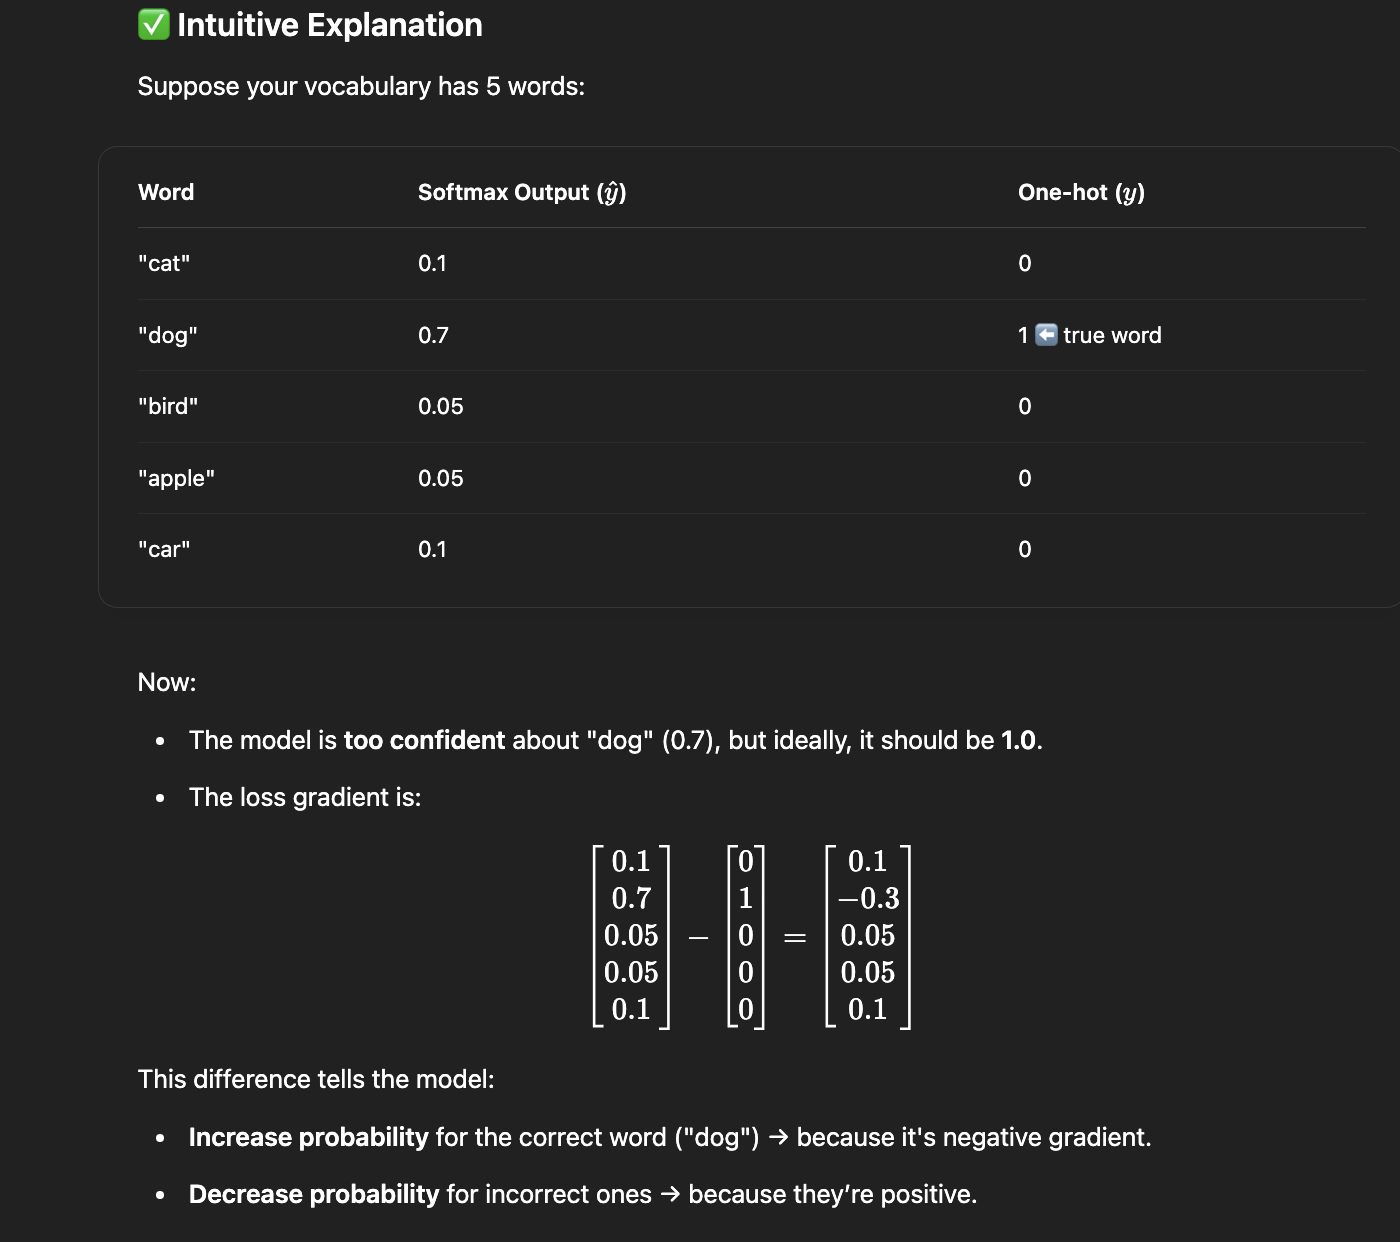

In [49]:
def gradient_descent(**args):
  # calculating dl/du- this is softmax+cross entropy
  du=  softmax_fuction-context_one_hot_vector #(ypred-ytrue)

  # calculating dw2
  # dl/dw2= dl/du * du/dw2
  #u = hidden_kayer_output(dim 5,) * W2
  # du/dw2= h
  #100,5


  dw2= np.outer(embedding_vec,du  )

  # calculating dembeiing layer output
  # dl/dh= dl/du * du/dw2 * dw2/dh(this is not logical) --> dl/du* du/dh
  #u = hidden_kayer_output(dim  5) * W2
  # du/dh= w2
  dh= np.dot(W2,du )

  # calculating  W1
  # dl/dW1=dl/du* du/dh * DH/DW1
  #h = inputvector * w1
  #dh/dw1= imputvector
  dw1= np.outer(center_one_hot_vector,dh)


  return du,dw2,dh,dw1




def update_weights(W1,W2,dw2,dw1,learning_rate = 0.001):
  W1= W1- learning_rate * dw1
  W2= W2- learning_rate * dw2
  return W1,W2

import numpy as np

In [99]:
embedding_dim=5

W1= np.random.randn(len(vocab),embedding_dim)
W2= np.random.randn(embedding_dim,len(vocab))
for epoch in range(2000):

  W1,W2,embedding_vec,output_layer,softmax_fuction=forward_propogation(W1=W1,W2=W2,center_one_hot_vector=center_one_hot_vector,vocab=vocab)
  du,dw2,dh,dw1= gradient_descent(W1=W1,W2=W2,embedding_vec=embedding_vec,output_layer=output_layer,softmax_fuction=softmax_fuction,center_one_hot_vector=center_one_hot_vector,context_one_hot_vector=context_one_hot_vector)
  W1,W2= update_weights(W1,W2,dw2,dw1)
  print("Loss:", -np.log(softmax_fuction[65]))




Loss: 7.287858967179259
Loss: 7.283519592684024
Loss: 7.279190782690242
Loss: 7.274872512786865
Loss: 7.270564758650977
Loss: 7.266267496047206
Loss: 7.2619807008271415
Loss: 7.257704348928755
Loss: 7.253438416375833
Loss: 7.249182879277408
Loss: 7.2449377138271975
Loss: 7.240702896303052
Loss: 7.236478403066404
Loss: 7.232264210561728
Loss: 7.228060295315993
Loss: 7.223866633938143
Loss: 7.219683203118557
Loss: 7.215509979628536
Loss: 7.2113469403197765
Loss: 7.20719406212387
Loss: 7.203051322051782
Loss: 7.198918697193364
Loss: 7.194796164716844
Loss: 7.190683701868342
Loss: 7.186581285971382
Loss: 7.182488894426406
Loss: 7.178406504710296
Loss: 7.174334094375906
Loss: 7.17027164105159
Loss: 7.166219122440736
Loss: 7.16217651632131
Loss: 7.158143800545401
Loss: 7.154120953038767
Loss: 7.150107951800394
Loss: 7.146104774902052
Loss: 7.142111400487859
Loss: 7.138127806773841
Loss: 7.134153972047513
Loss: 7.130189874667451
Loss: 7.126235493062868
Loss: 7.1222908057332015
Loss: 7.1183557

In [46]:
2.7383180356586068

In [100]:
softmax_fuction.argmax()

np.int64(15)

In [68]:
argmax_index = np.argmax(softmax_fuction)

In [69]:
argmax_index

np.int64(32)

In [98]:
softmax_fuction[16]

np.float64(0.1022179397326831)

In [78]:
id_to_word[65]

'milestone'